In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pycountry
from countryinfo import CountryInfo as CInfo # Se conecta con la informacion de cada país
import matplotlib.pyplot as plt
import  altair  as  alt # Graficos de promedios
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_tiobe= pd.read_csv("https://raw.githubusercontent.com/github/innovationgraph/main/data/languages.csv", delimiter=',')
data_tiobe

,num_pushers,language,language_type,iso2_code,year,quarter
0,2066,HTML,markup,AE,2020,1
1,1627,CSS,markup,AE,2020,1
2,288,Jupyter Notebook,markup,AE,2020,1
3,108,Vue,markup,AE,2020,1
4,1734,JavaScript,programming,AE,2020,1
...,...,...,...,...,...,...
104437,198,TypeScript,programming,ZW,2023,4
104438,150,C,programming,ZW,2023,4
104439,140,Dockerfile,programming,ZW,2023,4
104440,140,PHP,programming,ZW,2023,4


In [5]:
# Filtro de EU
data_tiobe = data_tiobe[data_tiobe.iso2_code != "EU"]

# Filtro de XK = Kosovo
data_tiobe = data_tiobe[data_tiobe.iso2_code != "XK"]

In [6]:
nan_rows_count = data_tiobe.isna().any(axis=1).sum()
print(f"There are {nan_rows_count} rows with NaN values in the dataset.")

There are 35 rows with NaN values in the dataset.


In [7]:
data_tiobe[data_tiobe["iso2_code"].isnull()] = "NA"

C:\Users\ronco\AppData\Local\Temp\ipykernel_4048\4228168363.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_tiobe[data_tiobe["iso2_code"].isnull()] = "NA"
C:\Users\ronco\AppData\Local\Temp\ipykernel_4048\4228168363.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_tiobe[data_tiobe["iso2_code"].isnull()] = "NA"
C:\Users\ronco\AppData\Local\Temp\ipykernel_4048\4228168363.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_tiobe[data_tiobe["iso2_code

Necesitamos unir a Visual Visual Basic .NET y Visual Basic 6.0

In [10]:
top_program_lang = programming_languages = [
    "Python", "SQL", "Java", "C",
    "Visual Basic .NET", "Visual Basic 6.0", 
    "Go", "C++", "JavaScript", "C#",
    "Fortran", "Pascal", "Ruby", "Go", "Assembly",
    "Swift", "MATLAB", "PHP", "Fortran"
]

In [11]:
data_tiobe['language'].value_counts()

language
HTML                2395
CSS                 2324
JavaScript          2312
Shell               2082
Python              2070
                    ... 
Csound                 1
Beef                   1
Omgrofl                1
Kit                    1
reStructuredText       1
Name: count, Length: 385, dtype: int64

In [12]:
data_tiobe = data_tiobe[data_tiobe['language'].isin(top_program_lang)]
data_tiobe = data_tiobe.reset_index(drop=True)
data_tiobe

,num_pushers,language,language_type,iso2_code,year,quarter
0,1734,JavaScript,programming,AE,2020,1
1,816,Python,programming,AE,2020,1
2,685,Java,programming,AE,2020,1
3,377,Ruby,programming,AE,2020,1
4,354,PHP,programming,AE,2020,1
...,...,...,...,...,...,...
20127,774,JavaScript,programming,ZW,2023,4
20128,391,Python,programming,ZW,2023,4
20129,150,C,programming,ZW,2023,4
20130,140,PHP,programming,ZW,2023,4


In [13]:
data_tiobe['year_quarter'] = data_tiobe['year'].astype(str) + '-Q' + data_tiobe['quarter'].astype(str)
data_tiobe
# Reseteamos el index
data_tiobe = data_tiobe.reset_index(drop=True)
data_tiobe

,num_pushers,language,language_type,iso2_code,year,quarter,year_quarter
0,1734,JavaScript,programming,AE,2020,1,2020-Q1
1,816,Python,programming,AE,2020,1,2020-Q1
2,685,Java,programming,AE,2020,1,2020-Q1
3,377,Ruby,programming,AE,2020,1,2020-Q1
4,354,PHP,programming,AE,2020,1,2020-Q1
...,...,...,...,...,...,...,...
20127,774,JavaScript,programming,ZW,2023,4,2023-Q4
20128,391,Python,programming,ZW,2023,4,2023-Q4
20129,150,C,programming,ZW,2023,4,2023-Q4
20130,140,PHP,programming,ZW,2023,4,2023-Q4


In [14]:
# Creating a unique identifier
data_tiobe['unique_id'] = data_tiobe['iso2_code'] + '-' + data_tiobe['language']

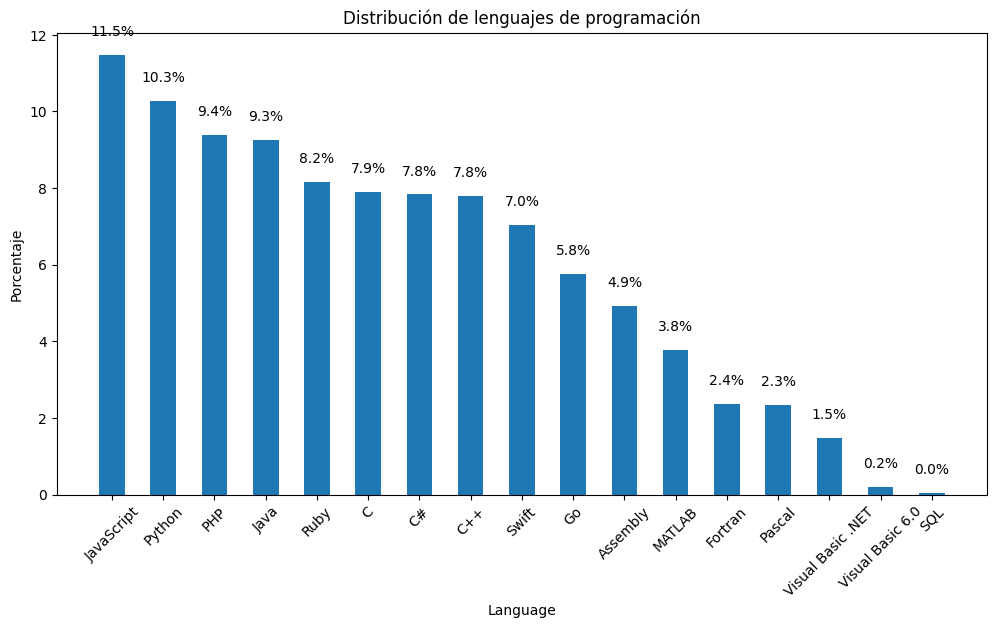

In [15]:
# Suponiendo que tienes un DataFrame llamado 'data' con la columna 'language'
distribucion_porcentual = data_tiobe['language'].value_counts(normalize=True) * 100

# Ancho de barras
bar_width = 0.5

# Índice de barras
index = distribucion_porcentual.index

# Gráfico
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(index, distribucion_porcentual.values, width=bar_width)

# Etiquetas de porcentaje
for i, v in enumerate(distribucion_porcentual.values):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.xlabel('Language')
plt.ylabel('Porcentaje')
plt.title('Distribución de lenguajes de programación')
plt.xticks(rotation=45)
plt.show()